In [1]:
import tensorflow as tf
train_path = '/kaggle/input/intel-image-classification/seg_train/seg_train/'
test_path = '/kaggle/input/intel-image-classification/seg_test/seg_test/'

In [2]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels='inferred',
    label_mode='int',
    color_mode='rgb',
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    seed=42,  
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_path,
    batch_size=32,
    image_size=(150, 150),
    seed=42,  
)

Found 14034 files belonging to 6 classes.


2022-07-25 14:11:40.186690: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 3000 files belonging to 6 classes.


In [3]:
class_names =train_data.class_names

2022-07-25 14:11:40.859328: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


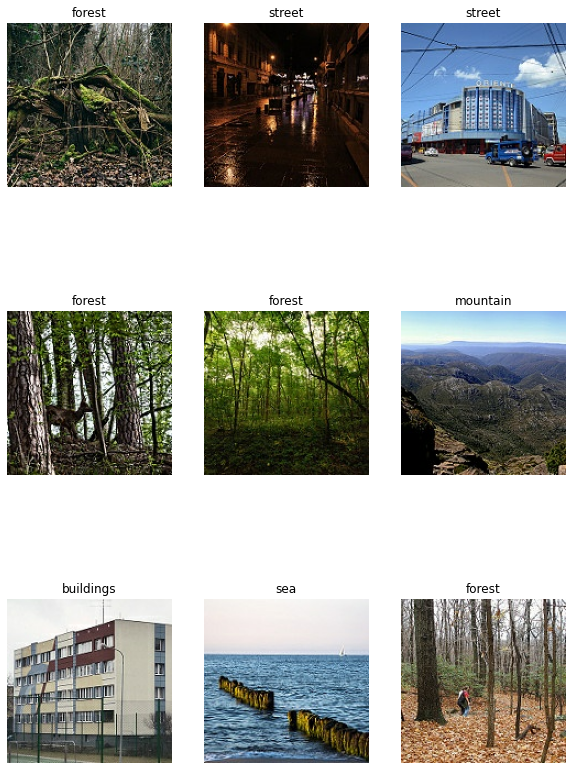

In [4]:
import matplotlib.pyplot as plt
import numpy 

plt.figure(figsize=(10,15))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')


In [5]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


In [6]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
model_1.summary()

NameError: name 'model_1' is not defined

In [ ]:
import keras
from tensorflow.keras import layers
num_classes = 6

inputs = layers.Input(shape =(150, 150, 3))
normalized = normalization_layer(inputs)
x = layers.Conv2D(32, 3, activation='relu')(normalized)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(32, 3, activation='relu')(x) 
x = layers.MaxPooling2D()(x)
print(x.shape)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(num_classes)(x)
model_1 = keras.Model(inputs, outputs)

In [ ]:
model_1.summary()

In [ ]:
#Compiling model
model_1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history_1 = model_1.fit(
  train_data,
  validation_data=test_data,
  epochs=5
)